# Airbnb Price Prediction Using Regression

**Objective**

The goal of this project is to predict Airbnb rental prices based on various features such as location, property type, number of bedrooms, and amenities. Accurate price predictions help hosts optimize their pricing strategies and assist travelers in finding listings that match their budget.




**Dataset Used**

The dataset contains listings of Airbnb properties, including details like:

**Numerical Features:** Accomodates, Price, number of bedrooms, review score.<br>
**Categorical Features:** Room type, Cancellation policy, Cleaning fee.<br>


### Methodology  
1. **Data Preprocessing:** Handling missing values, removing outliers, and encoding categorical variables.  
2. **Model Training:** Training **Linear Regression, Decision Tree, and Random Forest** models.  
3. **Evaluation:** Comparing models based on **R² Score, MAE, and RMSE** to identify the best-performing approach.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Importing Data

### 1. Basic Data Overview

- Print the first few rows of the dataset.
- Check data types and summary statistics.
- Identify missing values.

In [2]:
df = pd.read_csv("Air_BNB.csv")

## Data Exploration & Cleaning  

### Summary Statistics  
We analyze basic statistics using `df.describe()` to understand the distribution of variables like price, number of rooms, and reviews.  

### Handling Missing Values  
The dataset contains missing values in some features like `review scores`, `bathrooms`, `bedrooms`, `beds`, `cleaning fee`. We handle them by:  
- **Numerical columns:** Filling with the mean/median.  
- **Categorical columns:** Filling with the most frequent category or mode.  

### Outlier Treatment  
We identify price outliers using **box plots** and remove extreme values (e.g., listings with unreasonably high prices).  

In [3]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [6]:
df.tail()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [7]:
df.shape

(74111, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [9]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [10]:
round(df.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.16,2.15,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.24,0.58,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.07,7.84,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.27,0.85,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.71,1.25,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [11]:
df['room_type'].nunique()

3

In [12]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ':', df['room_type'].nunique())
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64

CANCELLATION_POLICY : 3
strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64

CLEANING_FEE : 3
True     54399
False    19708
Name: cleaning_fee, dtype: int64

INSTANT_BOOKABLE : 3
f    54660
t    19451
Name: instant_bookable, dtype: int64



In [13]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

### 2. Data Cleaning Steps

- Remove duplicate rows.
- Handle missing values (drop or fill).
- Convert data types if necessary.

In [14]:
df_2=df.copy()

In [15]:
df_2 = pd.get_dummies(df_2, columns = ['room_type', 'cancellation_policy','instant_bookable'],drop_first = True)

In [16]:
df_2 = df_2.rename(columns={'room_type_Private room': 'room_type_Private_room', 'room_type_Shared room': 'room_type_Shared_room'})

In [17]:
# Remove duplicate rows
df_2.drop_duplicates(inplace=True)

# Fill missing numerical values with mean
df_mean = df_2.copy()  # Create a copy of df_2 for mean replacement
num_cols_mean = df_mean.select_dtypes(include=['int64', 'float64']).columns
df_mean[num_cols_mean] = df_mean[num_cols_mean].fillna(df_mean[num_cols_mean].mean())

In [18]:
# Fill missing numerical values with median
df_median = df_2.copy()  # Create a copy of df_2 for median replacement
num_cols_median = df_median.select_dtypes(include=['int64', 'float64']).columns
df_median[num_cols_median] = df_median[num_cols_median].fillna(df_median[num_cols_median].median())

In [19]:
# Fill missing categorical values with mode
cat_cols = df_2.select_dtypes(include=['object']).columns
df_mean[cat_cols] = df_mean[cat_cols].fillna(df_mean[cat_cols].mode().iloc[0])
df_median[cat_cols] = df_median[cat_cols].fillna(df_median[cat_cols].mode().iloc[0])

In [20]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54116 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54116 non-null  float64
 1   bathrooms                     54116 non-null  float64
 2   cleaning_fee                  54116 non-null  bool   
 3   review_scores_rating          54116 non-null  float64
 4   bedrooms                      54116 non-null  float64
 5   beds                          54116 non-null  float64
 6   log_price                     54116 non-null  float64
 7   room_type_Private_room        54116 non-null  uint8  
 8   room_type_Shared_room         54116 non-null  uint8  
 9   cancellation_policy_moderate  54116 non-null  uint8  
 10  cancellation_policy_strict    54116 non-null  uint8  
 11  instant_bookable_t            54116 non-null  uint8  
dtypes: bool(1), float64(6), uint8(5)
memory usage: 3.2 MB


In [21]:
df_mean['cleaning_fee'] = df_mean['cleaning_fee'].astype(int)

In [22]:
df_median.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private_room          0
room_type_Shared_room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [23]:
df_median['cleaning_fee'] = df_median['cleaning_fee'].astype(int)

In [24]:
#'cleaning_fee' is categorical, fill missing values with mode
df_mean['cleaning_fee'] = df_mean['cleaning_fee'].fillna(df_mean['cleaning_fee'].mode().iloc[0])
df_median['cleaning_fee'] = df_median['cleaning_fee'].fillna(df_median['cleaning_fee'].mode().iloc[0])

In [25]:
# Check for missing values after filling
print("\nMissing values in df_mean after filling categorical columns:")
print(df_mean.isnull().sum())

print("\nMissing values in df_median after filling categorical columns:")
print(df_median.isnull().sum())


Missing values in df_mean after filling categorical columns:
accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private_room          0
room_type_Shared_room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

Missing values in df_median after filling categorical columns:
accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private_room          0
room_type_Shared_room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64


In [26]:
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the DataFrame and transform it (impute missing values)
df_imputed = imputer.fit_transform(df_2)

# Convert the imputed array back to a DataFrame with original column names
df_knn = pd.DataFrame(data = df_imputed, columns = df_2.columns)

In [27]:
df_knn

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.2,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54111,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
54112,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
54113,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
54114,2.0,1.0,1.0,96.6,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [28]:
df_knn.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private_room          0
room_type_Shared_room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

### Visualizations

**A. Price Distribution**

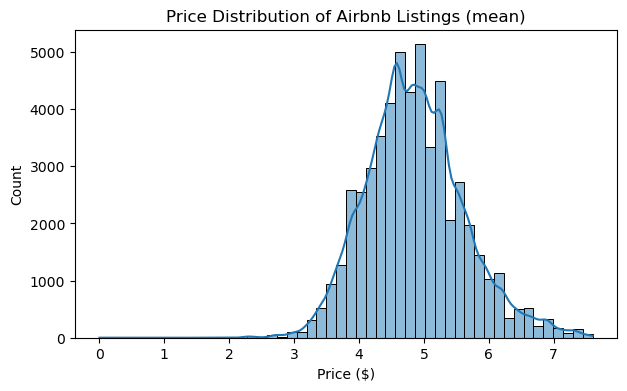

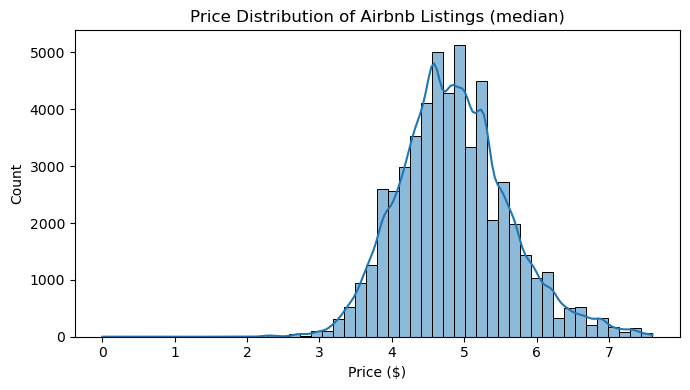

In [29]:
# Histogram for price distribution

# for mean
plt.figure(figsize=(7, 4))
sns.histplot(df_mean['log_price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings (mean)")
plt.xlabel("Price ($)")
plt.ylabel("Count")

# for median
plt.figure(figsize=(7, 4))
sns.histplot(df_median['log_price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings (median)")
plt.xlabel("Price ($)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### 1️⃣ Price Distribution & Outliers

- The price distribution is highly skewed, indicating that most Airbnb listings are priced on the lower end, but a few high-end properties inflate the average price.
- Outlier treatment was necessary, as extreme values could negatively impact model performance.

**B. Correlation Heatmap**

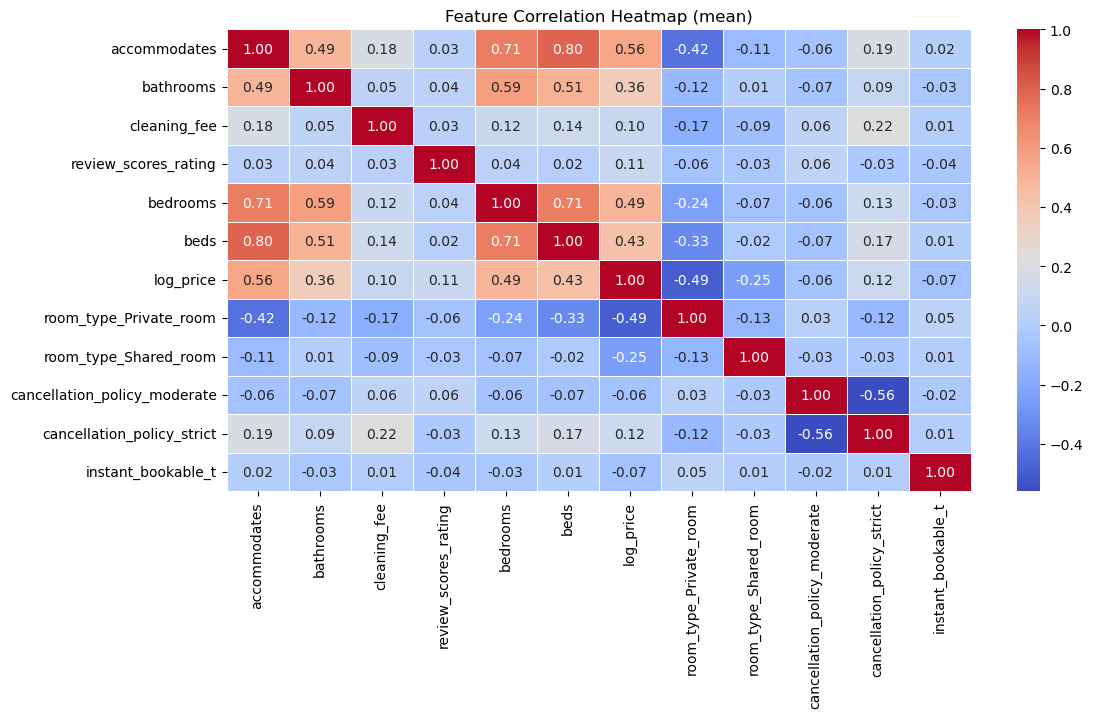

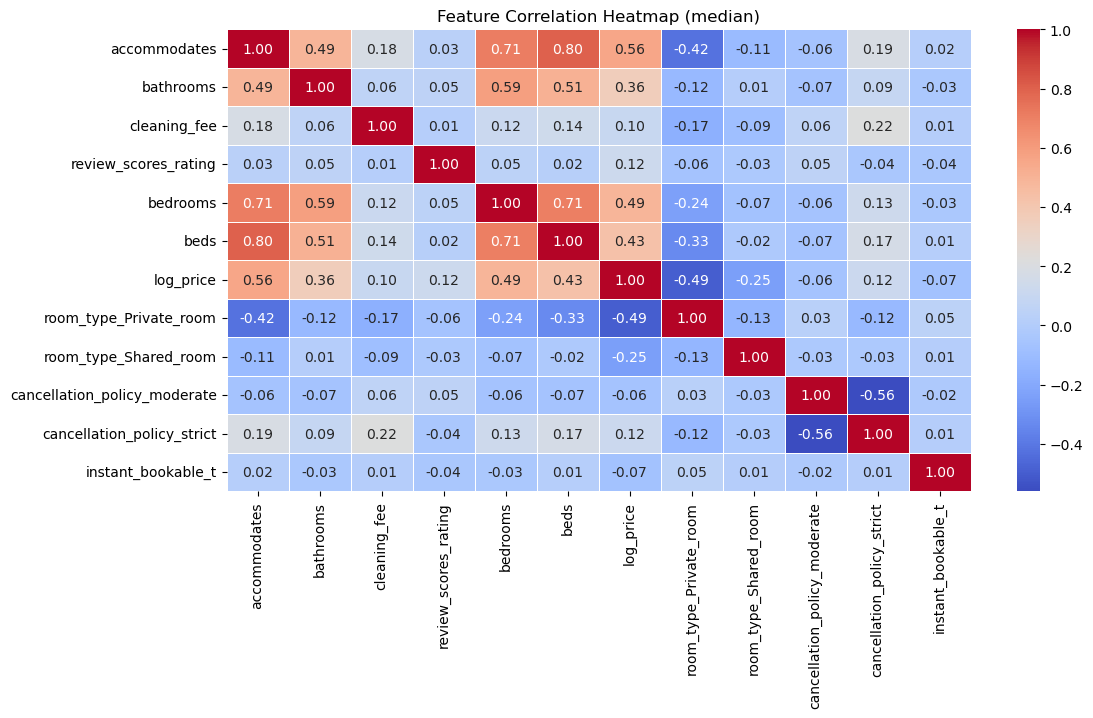

In [30]:
import numpy as np

# Compute the correlation matrix for mean values
corr_matrix_mean = df_mean.corr()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix_mean, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (mean)")


# Compute the correlation matrix for median values
corr_matrix_median = df_median.corr()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix_median, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (median)")

plt.show()

### 2️⃣Correlation Analysis

- The correlation matrix suggests that features like number of bedrooms and property type have a moderate impact on price.
- Some features had near-zero correlation, indicating they might not contribute much to the predictive model.
- **Room Type & Property Type:** Private rooms and entire homes have a noticeable effect on pricing. Entire homes generally have higher prices than private/shared rooms.
- **Review Score:** Listings with more review score tend to have more stable prices, but reviews do not strongly correlate with price.

**C. Boxplot to Detect Outliers**

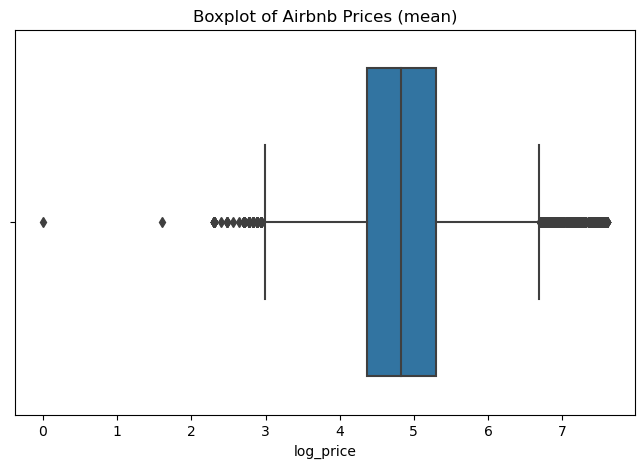

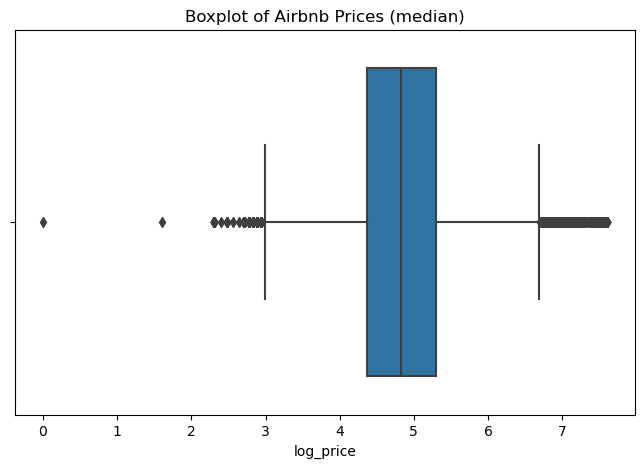

In [31]:
# Boxplot for outliers in price (mean)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_mean['log_price'])
plt.title("Boxplot of Airbnb Prices (mean)")

# Boxplot for outliers in price (median)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_median['log_price'])
plt.title("Boxplot of Airbnb Prices (median)")

plt.show()

**D. Scatter Plot (Price vs Number of Reviews)**

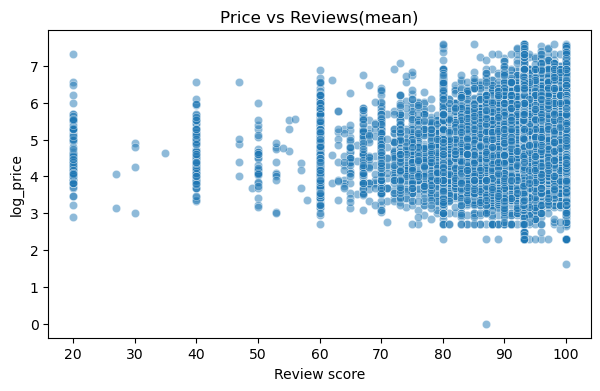

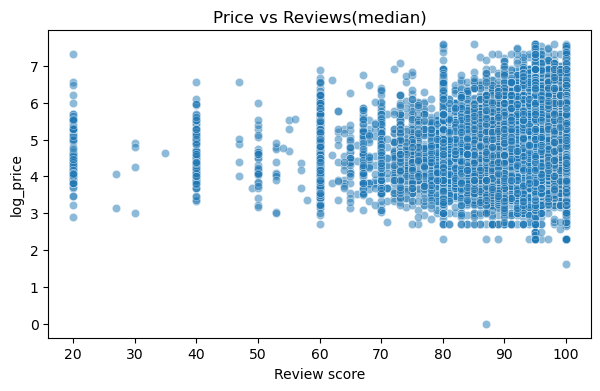

In [32]:
# Scatter plot for price vs reviews (mean)
plt.figure(figsize=(7, 4))
sns.scatterplot(x=df_mean['review_scores_rating'], y=df_2['log_price'], alpha=0.5)
plt.title("Price vs Reviews(mean)")
plt.xlabel("Review score")
plt.ylabel("log_price")

# Scatter plot for price vs reviews (median)
plt.figure(figsize=(7, 4))
sns.scatterplot(x=df_median['review_scores_rating'], y=df_2['log_price'], alpha=0.5)
plt.title("Price vs Reviews(median)")
plt.xlabel("Review score")
plt.ylabel("log_price")

plt.show()

## Outlier Treatment

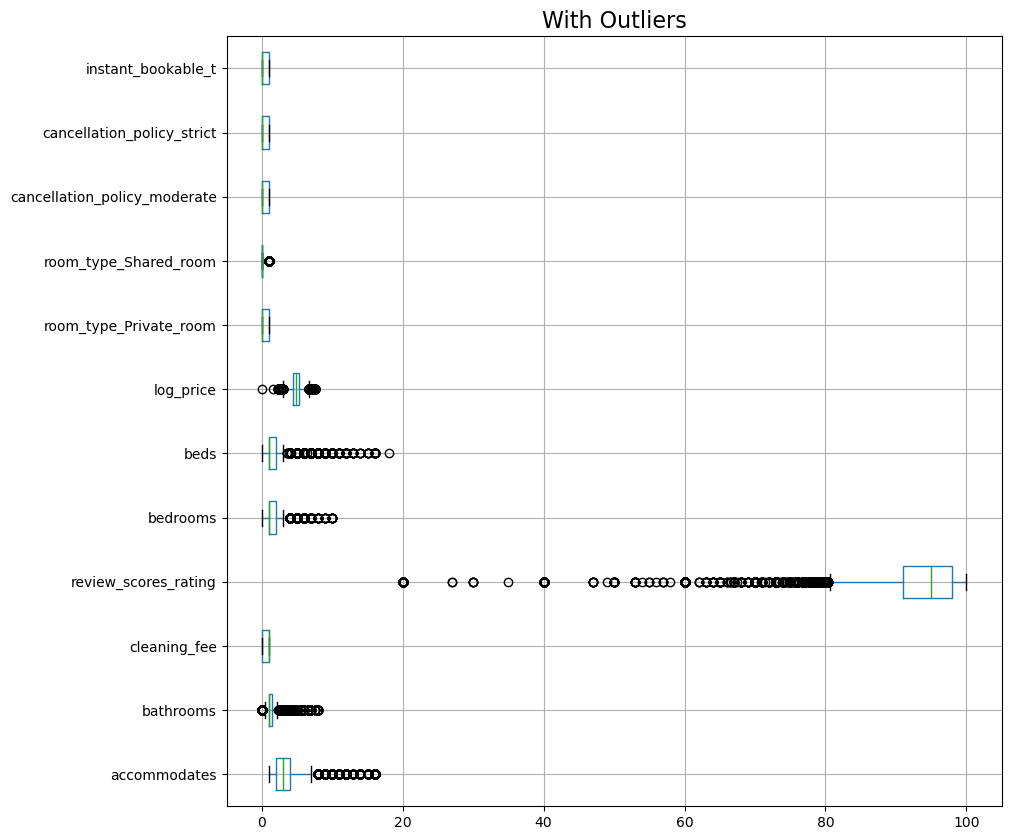

In [33]:
cont = df_knn.dtypes[(df_knn.dtypes!='uint8') & df_knn.dtypes!='bool'].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [34]:
df_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,1,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,1,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,1,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,1,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,1,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,1,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,1,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [35]:
import numpy as np

def remove_outlier(col):
    
    Q1, Q3 = np.percentile(col, [25, 75])      # Calculate the first and third quartiles (Q1 and Q3)
       
    IQR = Q3 - Q1      # Calculate the Interquartile Range (IQR)
    
    # Calculate the lower and upper bounds for outliers
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range, upper_range

In [36]:
remove_outlier(df_mean['review_scores_rating'])

(83.0, 107.0)

In [37]:
df_mean_out = df_mean.copy()
df_median_out = df_median.copy()
df_knn_out = df_knn.copy()

In [38]:
for column in df_mean_out.columns:
    lr,ur = remove_outlier(df_mean_out[column])
    df_mean_out[column] = np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
    df_mean_out[column] = np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

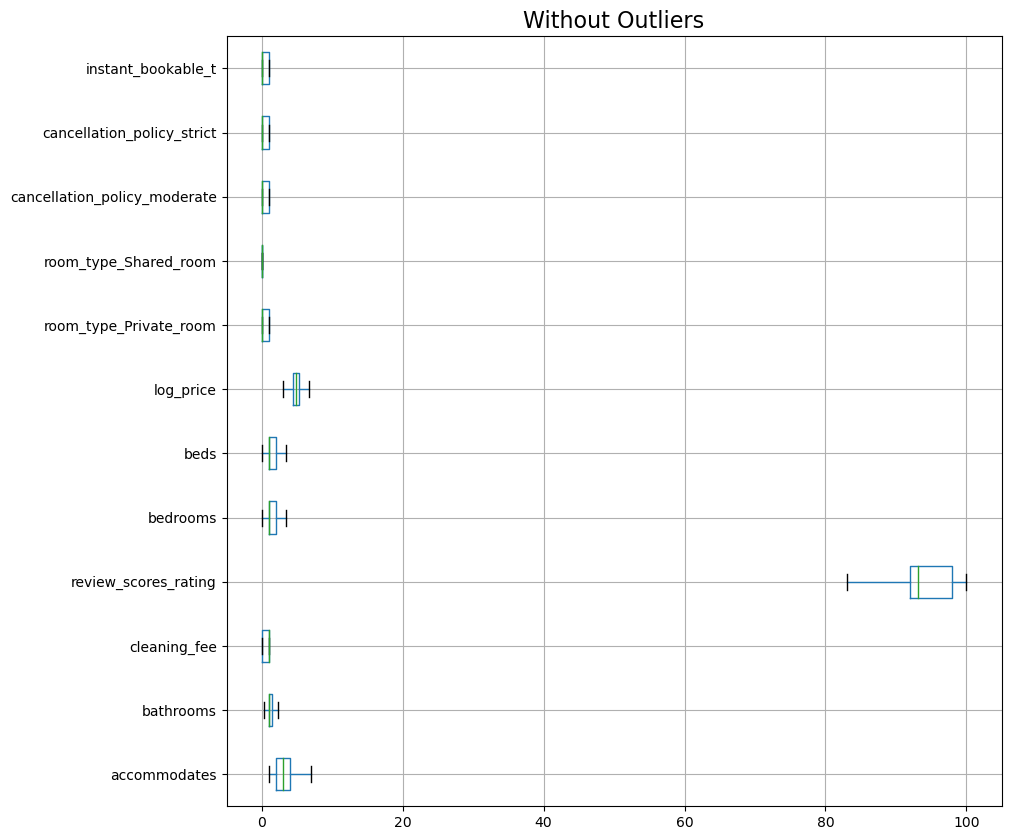

In [39]:
plt.figure(figsize=(10,10))
df_mean_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize=16)
plt.show()

In [40]:
for column in df_median_out.columns:
    lr,ur = remove_outlier(df_median_out[column])
    df_median_out[column] = np.where(df_median_out[column]>ur,ur,df_median_out[column])
    df_median_out[column] = np.where(df_median_out[column]<lr,lr,df_median_out[column])

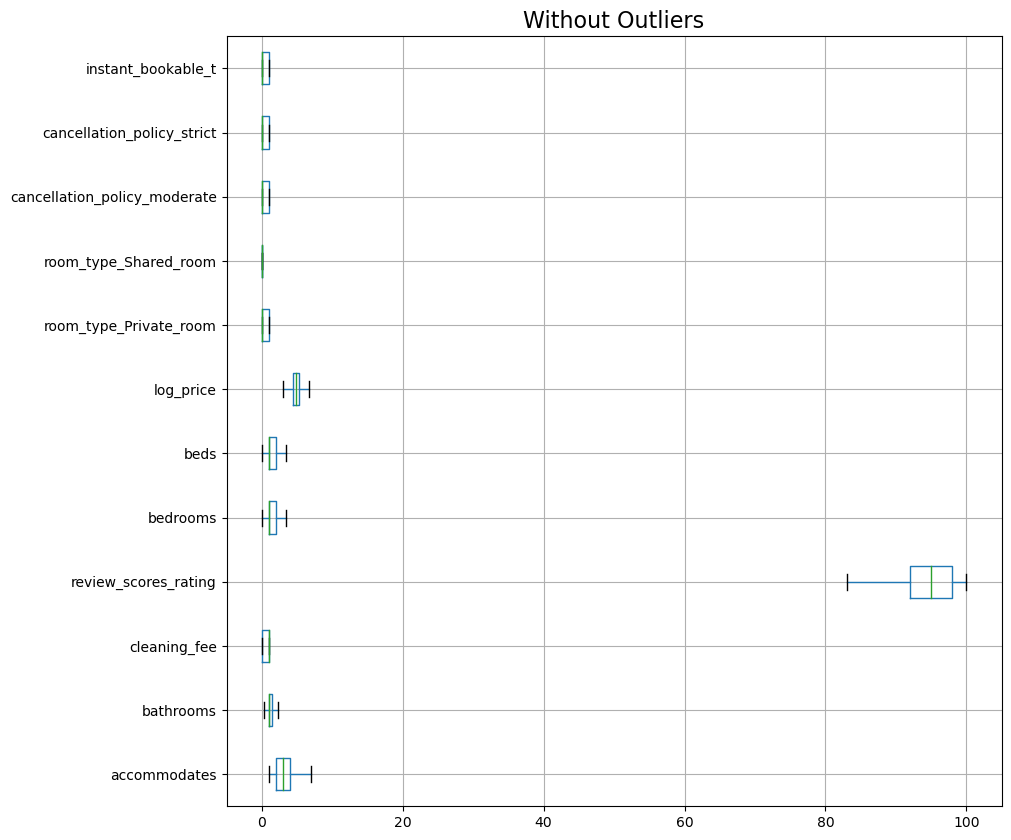

In [41]:
plt.figure(figsize=(10,10))
df_median_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize=16)
plt.show()

In [42]:
for column in df_knn_out.columns:
    lr,ur = remove_outlier(df_knn_out[column])
    df_knn_out[column] = np.where(df_knn_out[column]>ur,ur,df_knn_out[column])
    df_knn_out[column] = np.where(df_knn_out[column]<lr,lr,df_knn_out[column])

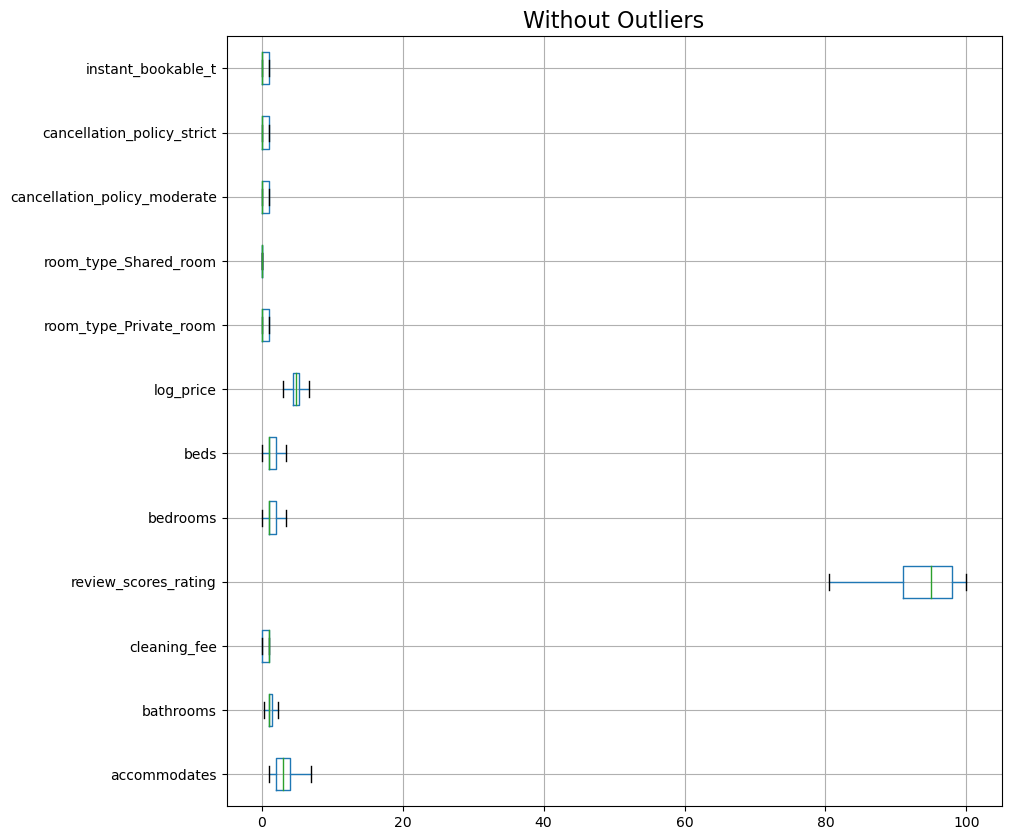

In [43]:
plt.figure(figsize=(10,10))
df_knn_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize=16)
plt.show()

## Data Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

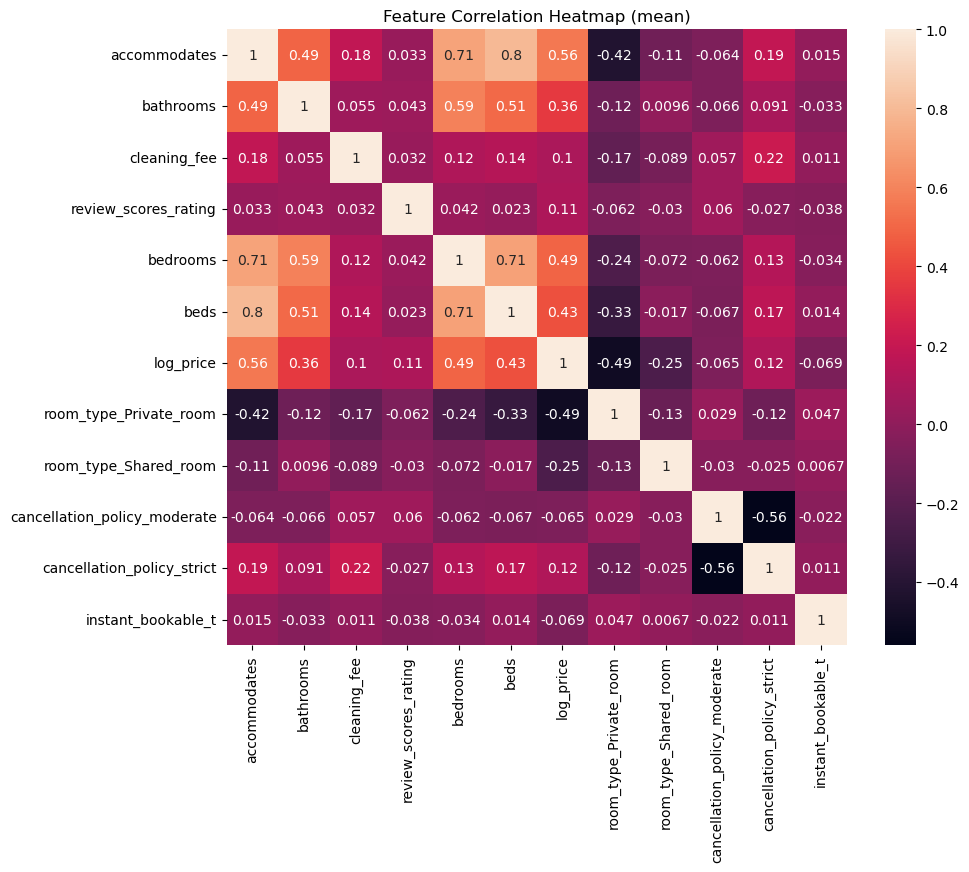

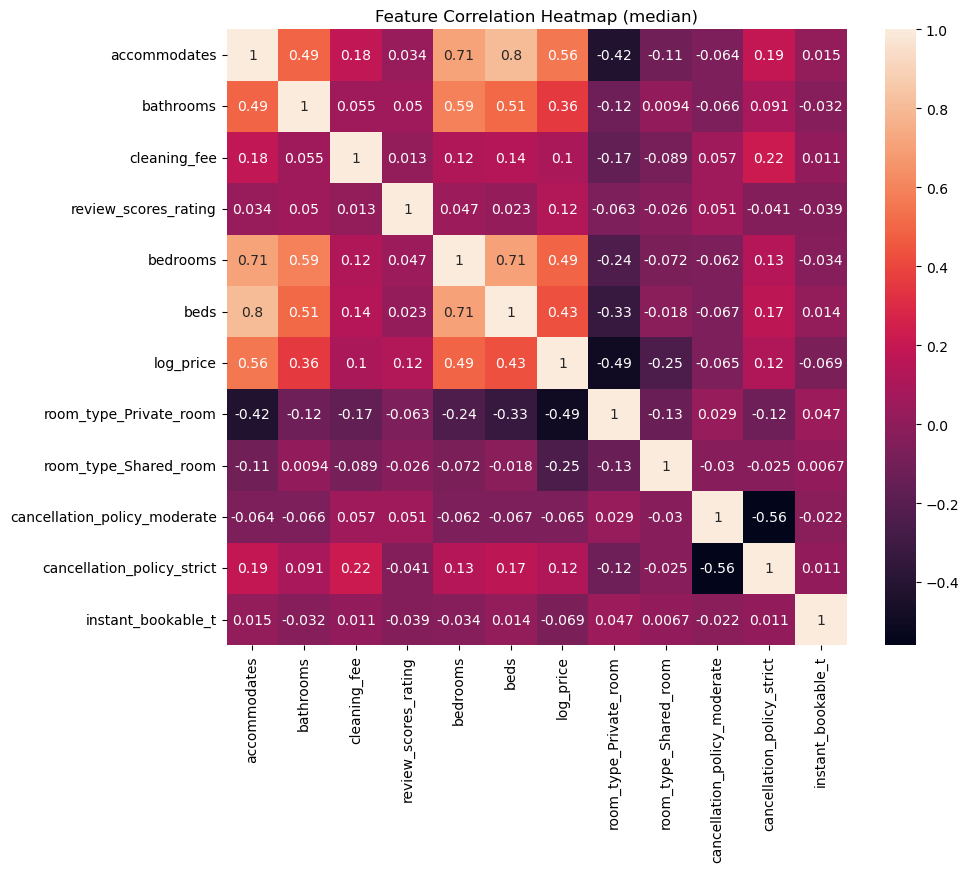

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df_mean.corr(), annot=True)
plt.title("Feature Correlation Heatmap (mean)")


plt.figure(figsize=(10,8))
sns.heatmap(df_median.corr(), annot=True)
plt.title("Feature Correlation Heatmap (median)")

plt.show


## Train-Test Split

In [45]:
X = df_mean_out.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_mean_out[['log_price']]

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54116 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54116 non-null  float64
 1   bathrooms                     54116 non-null  float64
 2   cleaning_fee                  54116 non-null  float64
 3   review_scores_rating          54116 non-null  float64
 4   bedrooms                      54116 non-null  float64
 5   beds                          54116 non-null  float64
 6   room_type_Private_room        54116 non-null  float64
 7   room_type_Shared_room         54116 non-null  float64
 8   cancellation_policy_moderate  54116 non-null  float64
 9   cancellation_policy_strict    54116 non-null  float64
 10  instant_bookable_t            54116 non-null  float64
dtypes: float64(11)
memory usage: 5.0 MB


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Linear Regression Model

In [48]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f"Linear Regression - R²: {r2_lr:.4f}, MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")


Linear Regression - R²: 0.4406, MAE: 0.42, RMSE: 0.55


## Mean - Outlier treated

In [50]:
regression_model.score(X_train,y_train)

0.4449059910087473

## Mean - Outlier not treated

In [51]:
X = df_mean.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_mean[['log_price']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [54]:
regression_model.score(X_train,y_train)

0.5060487373884485

## Median - Outlier Treated

In [55]:
X = df_median_out.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_median_out[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.4478887170585074

## Median - Outlier not Treated

In [56]:
X = df_median.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_median[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.507546596907674

## KNN - Outlier Treated

In [57]:
X = df_knn_out.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_knn_out[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.4502869390652464

## KNN - Outlier not Treated

In [58]:
X = df_knn.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_knn[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.5085950240103843

In [59]:
df_2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,True,100.0,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,True,93.0,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.0,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,True,NaN,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,True,40.0,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,True,100.0,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,True,93.0,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,True,94.0,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,True,NaN,0.0,2.0,5.273000,0,0,0,1,1


In [60]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
53745,12.0,1.0,1.0,89.0,3.0,9.0,0.0,0.0,1.0,0.0,0.0,5.298317
25136,7.0,1.0,0.0,100.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,5.0,1.0,1.0,93.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,5.433722
2034,16.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930


In [61]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable_t+review_scores_rating + bedrooms + beds + room_type_Private_room + room_type_Shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee'

In [62]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula=expr, data = data_train).fit()
lm1.params

Intercept                       3.941486
accommodates                    0.073749
bathrooms                       0.149112
instant_bookable_t             -0.055343
review_scores_rating            0.007555
bedrooms                        0.154830
beds                           -0.048604
room_type_Private_room         -0.641426
room_type_Shared_room          -1.123487
cancellation_policy_moderate   -0.067323
cancellation_policy_strict     -0.009347
cleaning_fee                   -0.080803
dtype: float64

In [63]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.07374895625319211
The coefficient for bathrooms is 0.14911154393437637
The coefficient for cleaning_fee is -0.08080348489085222
The coefficient for review_scores_rating is 0.007554691395044069
The coefficient for bedrooms is 0.15483022861238588
The coefficient for beds is -0.048603870495331075
The coefficient for room_type_Private_room is -0.6414257377435627
The coefficient for room_type_Shared_room is -1.1234872726029692
The coefficient for cancellation_policy_moderate is -0.06732276079718291
The coefficient for cancellation_policy_strict is -0.009347362136753263
The coefficient for instant_bookable_t is -0.05534292656988277


In [64]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.9414860970642045


## Model Selection  

To predict Airbnb prices, we train and compare three models:  

1. **Linear Regression:**  
   - Assumes a linear relationship between features and price.  
   - Simple, interpretable, but may not capture complex patterns.

2. **Decision Tree Regressor:**  
   - Splits data into branches based on the most important features.  
   - Works well for capturing non-linear relationships but may overfit.

3. **Random Forest Regressor:**  
   - Uses multiple decision trees and averages results for better accuracy.  
   - Reduces overfitting compared to a single decision tree.

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, method_name):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    }
    
    results = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        
        results.append({
            'Method': method_name,
            'Model': model_name,
            'R² Score': r2,
            'MAE': mae,
            'RMSE': rmse
        })
        
        print(f"{method_name} - {model_name} -> R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    
    return results

In [66]:
from sklearn.model_selection import train_test_split
import pandas as pd

# List of preprocessing methods
datasets = {
    "Mean": df_mean,
    "Mean-Outlier Treated": df_mean_out,
    "Median": df_median,
    "Median-Outlier Treated": df_median_out,
    "KNN": df_knn,
    "KNN-Outlier Treated": df_knn_out
}

final_results = []

# Train and evaluate models on each dataset
for method, df_2 in datasets.items():
    X = df_2.drop(columns=['log_price'])  # Assuming 'price' is the target variable
    y = df_2['log_price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = train_and_evaluate(X_train, X_test, y_train, y_test, method)
    final_results.extend(results)

# Convert results to DataFrame
results_df = pd.DataFrame(final_results)

Mean - Linear Regression -> R²: 0.5112, MAE: 0.41, RMSE: 0.53
Mean - Decision Tree -> R²: 0.3777, MAE: 0.45, RMSE: 0.60
Mean - Random Forest -> R²: 0.4896, MAE: 0.42, RMSE: 0.54
Mean-Outlier Treated - Linear Regression -> R²: 0.4402, MAE: 0.42, RMSE: 0.55
Mean-Outlier Treated - Decision Tree -> R²: 0.3955, MAE: 0.44, RMSE: 0.57
Mean-Outlier Treated - Random Forest -> R²: 0.4662, MAE: 0.42, RMSE: 0.54
Median - Linear Regression -> R²: 0.5128, MAE: 0.40, RMSE: 0.53
Median - Decision Tree -> R²: 0.3885, MAE: 0.45, RMSE: 0.59
Median - Random Forest -> R²: 0.4894, MAE: 0.42, RMSE: 0.54
Median-Outlier Treated - Linear Regression -> R²: 0.4434, MAE: 0.42, RMSE: 0.55
Median-Outlier Treated - Decision Tree -> R²: 0.4023, MAE: 0.44, RMSE: 0.57
Median-Outlier Treated - Random Forest -> R²: 0.4668, MAE: 0.42, RMSE: 0.54
KNN - Linear Regression -> R²: 0.5142, MAE: 0.40, RMSE: 0.53
KNN - Decision Tree -> R²: 0.3757, MAE: 0.45, RMSE: 0.60
KNN - Random Forest -> R²: 0.5177, MAE: 0.40, RMSE: 0.53
KNN-O

## Model Evaluation  

We compare models using three metrics:  

1. **R² Score:** Measures how well the model explains price variations. Higher is better.  
2. **Mean Absolute Error (MAE):** Measures the average error in predictions. Lower is better.  
3. **Root Mean Squared Error (RMSE):** Similar to MAE but penalizes larger errors more. Lower is better.  

We select the model with **higher R² and lower MAE/RMSE** as the best-performing model.  

In [67]:
# Display results sorted by R² Score for best performance comparison
print(results_df.sort_values(by=['Method', 'R² Score'], ascending=[True, False]))

                    Method              Model  R² Score       MAE      RMSE
14                     KNN      Random Forest  0.517710  0.404758  0.528279
12                     KNN  Linear Regression  0.514175  0.404370  0.530212
13                     KNN      Decision Tree  0.375693  0.447865  0.601048
17     KNN-Outlier Treated      Random Forest  0.495269  0.406226  0.524391
15     KNN-Outlier Treated  Linear Regression  0.446606  0.419962  0.549088
16     KNN-Outlier Treated      Decision Tree  0.393636  0.435390  0.574767
0                     Mean  Linear Regression  0.511211  0.405425  0.531827
2                     Mean      Random Forest  0.489559  0.417811  0.543479
1                     Mean      Decision Tree  0.377696  0.454761  0.600083
5     Mean-Outlier Treated      Random Forest  0.466224  0.418273  0.539268
3     Mean-Outlier Treated  Linear Regression  0.440186  0.421913  0.552264
4     Mean-Outlier Treated      Decision Tree  0.395537  0.441110  0.573865
6           

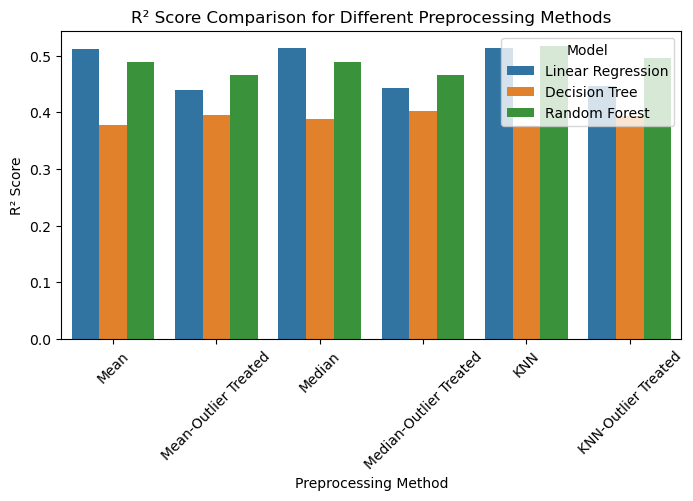

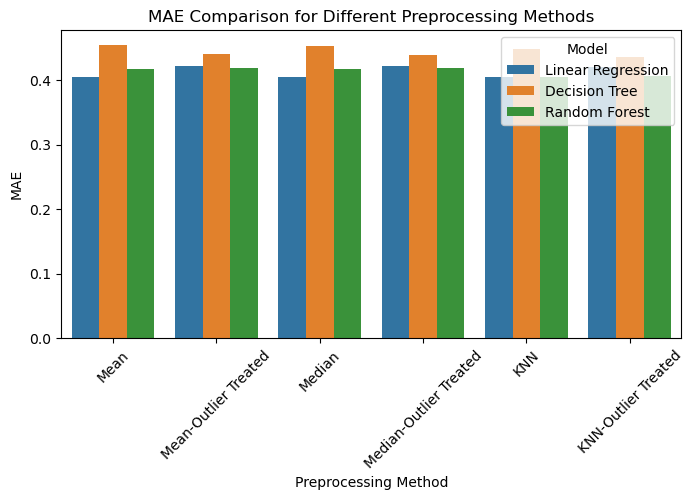

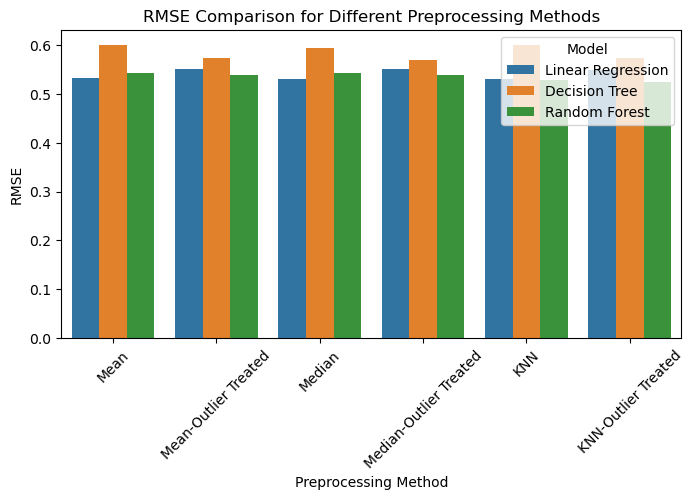

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot R² Score comparison
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x="Method", y="R² Score", hue="Model")
plt.xticks(rotation=45)
plt.title("R² Score Comparison for Different Preprocessing Methods")
plt.ylabel("R² Score")
plt.xlabel("Preprocessing Method")
plt.legend(title="Model")
plt.show()

# Plot MAE comparison
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x="Method", y="MAE", hue="Model")
plt.xticks(rotation=45)
plt.title("MAE Comparison for Different Preprocessing Methods")
plt.ylabel("MAE")
plt.xlabel("Preprocessing Method")
plt.legend(title="Model")
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x="Method", y="RMSE", hue="Model")
plt.xticks(rotation=45)
plt.title("RMSE Comparison for Different Preprocessing Methods")
plt.ylabel("RMSE")
plt.xlabel("Preprocessing Method")
plt.legend(title="Model")
plt.show()

In [69]:
# Get the best-performing model and preprocessing method
best_result = results_df.sort_values(by="R² Score", ascending=False).iloc[0]
best_model = best_result["Model"]
best_method = best_result["Method"]

print(f"Best Model: {best_model}")
print(f"Best Preprocessing Method: {best_method}")

Best Model: Random Forest
Best Preprocessing Method: KNN


### 3️⃣ Model Performance Comparison

- Random Forest performed best, achieving the highest R² score (0.5177) while keeping MAE and RMSE lower.

## Conclusion & Insights  

- **Best Model:** Random Forest performed the best with an R² Score of **0.517710** and the lowest MAE.  
- **Feature Impact:** Features like `room_type`, and `review_scores_rating` significantly influenced prices.  

**Next Steps:**  
  - Try additional feature engineering.  
  - Collect more data to improve predictions.  
  - Experiment with advanced models like **Gradient Boosting** (optional).  